#YBS437 K-means Clustering Project Kaan

##Explanation Examples

####Explanation as X and Y Basis

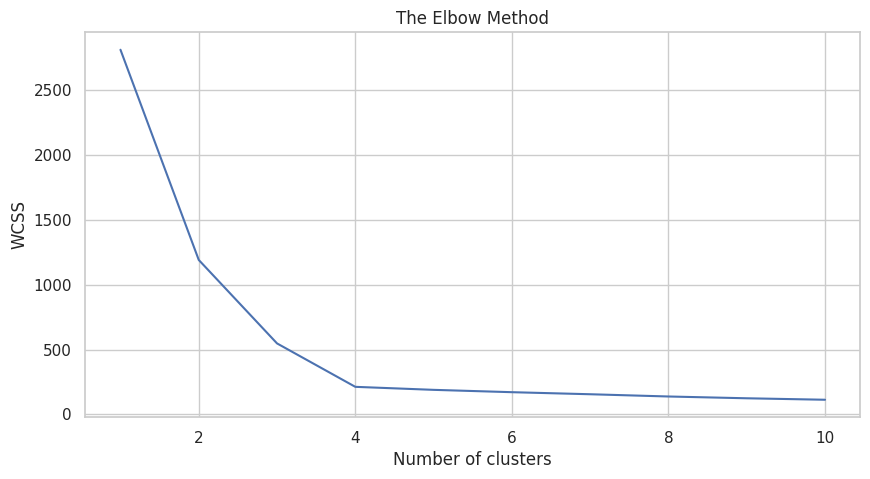

Based on the graph above, the 'elbow' is at K=4.


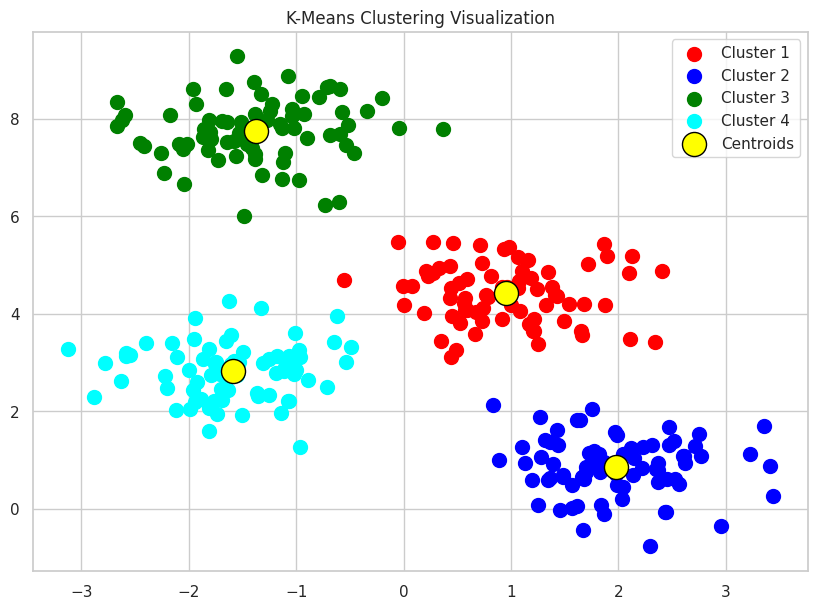

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate Synthetic Data
# We create 300 data points grouped into 4 distinct areas (centers)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Finding the Optimal 'K' (The Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

print("Based on the graph above, the 'elbow' is at K=4.")

# 3. Applying K-Means with the Optimal K
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 4. Visualizing the Clusters
plt.figure(figsize=(10, 7))

# Plotting the data points for each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting the Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

####Explanation on Line

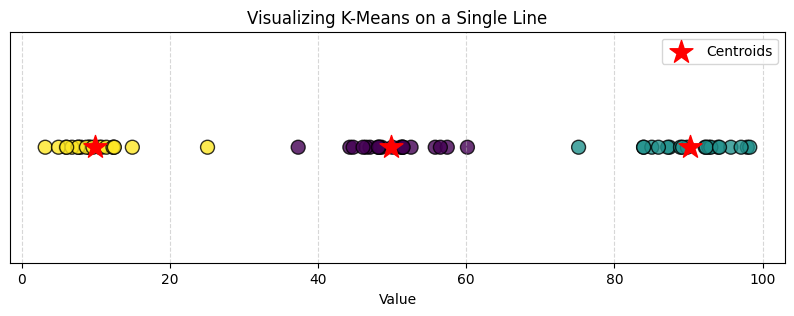

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Generate generic 1D data (3 groups of random numbers)
# We use random numbers centered at 10, 50, and 90
group_a = np.random.normal(10, 5, 20)
group_b = np.random.normal(50, 5, 20)
group_c = np.random.normal(90, 5, 20)

# Combine into a single list of numbers
data_points = np.concatenate((group_a, group_b, group_c))

# Reshape for the algorithm (Required format: [[10], [50], ...])
points_reshaped = data_points.reshape(-1, 1)

# 2. Apply K-Means
# We ask it to find 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(points_reshaped)

# Get the results
predicted_clusters = kmeans.predict(points_reshaped)
centroids = kmeans.cluster_centers_

# 3. Visualize on a simple Line
plt.figure(figsize=(10, 3))

# Plot the data points on the line (y=0)
plt.scatter(points_reshaped, np.zeros_like(points_reshaped),
            c=predicted_clusters, cmap='viridis', s=100, alpha=0.8, edgecolors='black')

# Plot the Centroids (The "Centers" of each group)
plt.scatter(centroids, np.zeros_like(centroids),
            c='red', s=300, marker='*', label='Centroids')

# Clean up the chart to look like a ruler/line
plt.yticks([]) # Remove Y-axis (since it's 1D)
plt.xlabel('Value')
plt.title('Visualizing K-Means on a Single Line')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

##Countries Example

####Importing Data

In [5]:
import pandas as pd

In [6]:
path_to_file = "/content/countries.csv"
london_data = pd.read_csv(path_to_file)

In [7]:
print(london_data.head())

          name  Longitude   Latitude
0        Aruba -69.982677  12.520880
1  Afghanistan  66.004734  33.835231
2       Angola  17.537368 -12.293361
3     Anguilla -63.064989  18.223959
4      Albania  20.049834  41.142450


In [8]:
print(london_data.shape)

(241, 3)


In [9]:
print(london_data.dtypes)

name          object
Longitude    float64
Latitude     float64
dtype: object


In [10]:
url = "http://users.stat.ufl.edu/~winner/data/resid_energy.dat"
energy_data = pd.read_csv(url, sep=r"\s+", header=None)
print(energy_data.head())

      0       1     2     3      4      5     6     7      8
0  1984  235.83  3.93  2.69  44.80  20.17  5.72  7.57  15.96
1  1985  237.92  4.22  2.67  45.64  20.13  5.52  7.06  16.04
2  1986  240.13  4.46  2.66  47.26  19.84  5.17  5.50  15.98
3  1987  242.29  4.74  2.64  47.85  19.22  4.73  5.10  16.26
4  1988  244.50  5.10  2.62  48.22  18.53  4.49  4.96  17.13


In [11]:
print(energy_data.shape)

(27, 9)


In [12]:
print(energy_data.dtypes)

0      int64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object


#####Load Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
pd.set_option('display.max_rows', 250)
data = pd.read_csv("countries.csv")
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


#####Plot Data

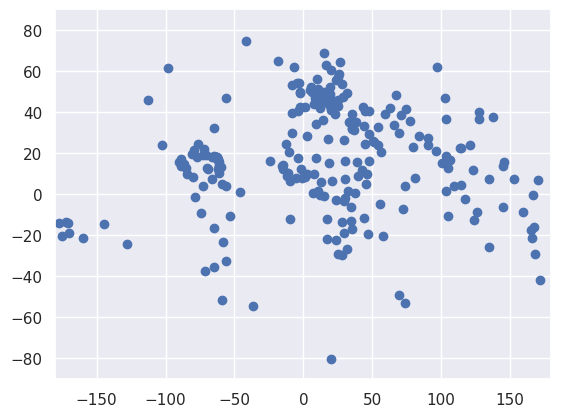

In [19]:
plt.scatter(data["Longitude"],data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#####Select Features

In [21]:
data2 = data.copy()
data2 = data2.iloc[:,1:3]
data2

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
5,19.953288,60.214887
6,1.560544,42.542291
7,54.300167,23.905282
8,-65.179807,-35.381349
9,44.929933,40.289526


#####Clustering

In [22]:
kmeans = KMeans(2)
identified_clusters = kmeans.fit_predict(data2)

#####Results

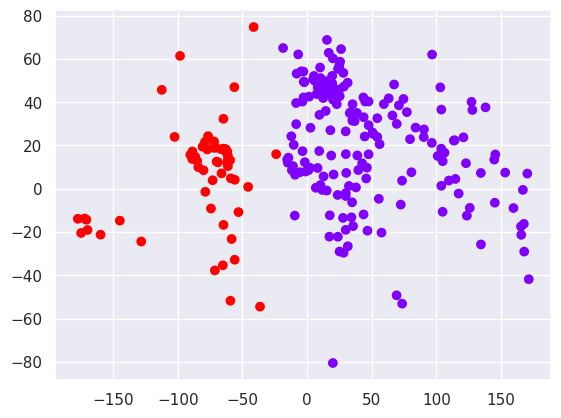

In [23]:
data_with_clusters = data2.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters
plt.scatter(data_with_clusters["Longitude"],data_with_clusters["Latitude"],c=data_with_clusters["Clusters"],cmap="rainbow")

Longitude refers to vertically
Latitude refers to horizontally
countries.csv is the file that gives countries geographical locations. By using K-means clustering, seperate them like world map bases is also possible.
